In [1]:
import numpy as np
import pandas as pd
import os
import graphviz

import sklearn
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
basedir = os.getcwd()
datadir = basedir + '/Data'

print(basedir)
print(datadir)

C:\Users\Ale P\Documents\microbiomeproject
C:\Users\Ale P\Documents\microbiomeproject/Data


In [3]:
os.listdir(datadir)

['features_processed.csv',
 'labels_processed.csv',
 'microbiome_data.csv',
 'otu_annotation.csv',
 'sample_desc_deid.csv',
 'X_processed.csv',
 'y2_processed.csv',
 'y_processed.csv']

In [4]:
features = pd.read_csv(datadir + '/features_processed.csv', index_col = 0)
labels = pd.read_csv(datadir + '/labels_processed.csv', index_col = 0)

In [5]:
labels

,SubjectID,#SampleID,BodySite,Preterm
1,10005,1000501278,Vaginal_Swab,0
6,10003,1000301298,Vaginal_Swab,0
7,10003,1000301308,Vaginal_Swab,0
8,10003,1000301318,Vaginal_Swab,0
9,10004,1000401368,Vaginal_Swab,0
...,...,...,...,...
4396,10046,1004604448.rs,Tooth_Gum,0
4397,10101,1010104488.rs,Tooth_Gum,1
4398,10024,1002402218.ca2.rs,Stool,0
4399,10023,1002302248.bn1.rs,Stool,0


In [6]:
features

,SubjectID,#SampleID,BodySite,History_of_preterm_delivery,GestWeekdel,PPROM,Hypertensive Disorder,Preeclampsia,Number_of_babies,Mean_OTU,unique_OTU,shannon_div,standard_dev,Preterm
1,10005,1000501278,Vaginal_Swab,0.0,40.0,0.0,1.0,0.0,1.0,50.550000,16,0.021199,25.550941,0
6,10003,1000301298,Vaginal_Swab,1.0,38.0,0.0,1.0,0.0,1.0,59.980769,17,0.037150,51.114763,0
7,10003,1000301308,Vaginal_Swab,1.0,38.0,0.0,1.0,0.0,1.0,59.980769,12,0.020697,24.790647,0
8,10003,1000301318,Vaginal_Swab,1.0,38.0,0.0,1.0,0.0,1.0,59.980769,23,0.038345,50.092526,0
9,10004,1000401368,Vaginal_Swab,0.0,40.0,0.0,0.0,0.0,1.0,68.370370,30,0.030563,30.201347,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,10046,1004604448.rs,Tooth_Gum,0.0,40.0,0.0,0.0,0.0,1.0,83.692810,97,0.088239,32.568406,0
4397,10101,1010104488.rs,Tooth_Gum,1.0,37.0,1.0,0.0,0.0,1.0,89.315534,81,0.063389,19.547182,1
4398,10024,1002402218.ca2.rs,Stool,0.0,38.0,0.0,3.0,0.0,1.0,67.545455,81,0.081020,30.734053,0
4399,10023,1002302248.bn1.rs,Stool,0.0,40.0,0.0,0.0,0.0,1.0,81.754839,178,0.093405,17.526890,0


In [9]:
X_processed

,History_of_preterm_delivery,GestDayColl,GestWeekColl,TrimColl,BodySite_Cord Blood (Serum),BodySite_Saliva,BodySite_Skin,BodySite_Stool,BodySite_Tooth_Gum,BodySite_Urine,...,coOTU_1452_13,coOTU_1452_1452,Shannon_entropy,gini_index,dominance,brillouin_d,chao1,simpson,singles,doubles
1000501278,0.0,188.0,27.0,3.0,0,0,0,0,0,0,...,0,0,0.515869,0.998724,0.878582,0.339789,21.250000,0.121418,7,3
1000101018,0.0,-73.0,-9.0,0.0,0,0,0,0,0,0,...,1,0,1.285110,0.997015,0.733234,0.842456,95.000000,0.266766,31,14
1000101028,0.0,-65.0,-8.0,0.0,0,0,0,0,0,0,...,2,0,0.559740,0.998687,0.865172,0.372921,33.000000,0.134828,11,4
1000301298,1.0,198.0,29.0,3.0,0,0,0,0,0,0,...,0,0,0.480342,0.998747,0.889479,0.322382,24.000000,0.110521,7,2
1000301308,1.0,205.0,30.0,3.0,0,0,0,0,0,0,...,0,0,0.518144,0.998740,0.876572,0.343892,18.000000,0.123428,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004604448.rs,0.0,303.0,44.0,4.0,0,0,0,0,1,0,...,556,1074,3.950885,0.991991,0.116676,2.696399,122.000000,0.883324,25,11
1010104488.rs,1.0,311.0,45.0,4.0,0,0,0,0,1,0,...,84,18,4.182459,0.991772,0.095030,2.847923,104.076923,0.904970,25,12
1002402218.ca2.rs,0.0,150.0,22.0,2.0,0,0,0,1,0,0,...,0,0,3.866429,0.992793,0.124292,2.640516,109.875000,0.875708,22,7
1002302248.bn1.rs,0.0,169.0,25.0,2.0,0,0,0,1,0,0,...,0,0,5.551600,0.978841,0.041594,3.765622,216.896552,0.958406,48,28


In [10]:
from sklearn.tree import DecisionTreeClassifier

y = labels['Preterm']
X = features[['Mean_OTU']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# This is where we set our machine learning algorithm type - Decision Tree
dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
dectree.fit(X_train,y_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree = dectree.predict(X_test)

In [11]:
#print decision tree
#dot_data = tree.export_graphviz(dectree, out_file=None, impurity=False) 
#graph = graphviz.Source(dot_data) 
#graph

dot_data = tree.export_graphviz(dectree,out_file=None,feature_names=X.columns,class_names=['Not Preterm','Preterm'])
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open(basedir + "/figures/OTUtree.txt","w+")
f.write(dot_data)
f.close()

In [15]:
# Calculate the accuracy of the model as a percent
accuracy = metrics.accuracy_score(y_test, y_pred_dectree)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

Accuracy:  100.0


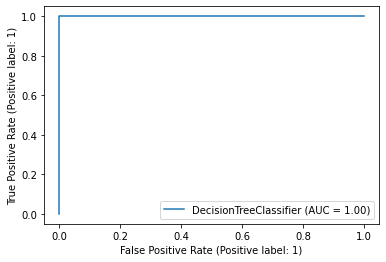

In [12]:
metrics.plot_roc_curve(dectree, X_test, y_test)